<a href="https://colab.research.google.com/github/southeastwind13/deep_learning/blob/main/2_Linear_Regression_(Moore's_Law).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get data from URLs
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-09-05 19:52:32--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-09-05 19:52:33 (31.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
# Check data in the current path
!ls

moore.csv  sample_data


In [4]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1) # Make it a 2-D array of size N x D where D = 1
Y = data[:,1].reshape(-1,1)

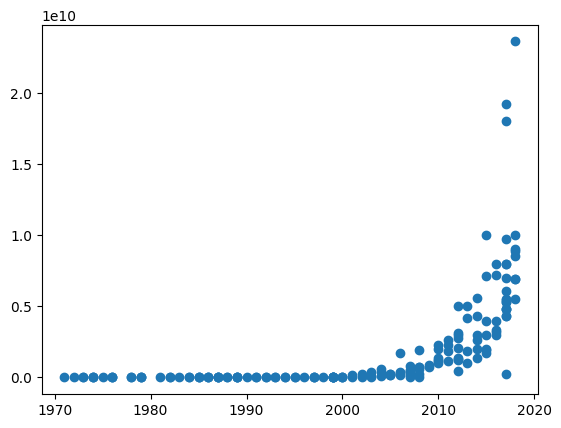

In [5]:
plt.scatter(X, Y)

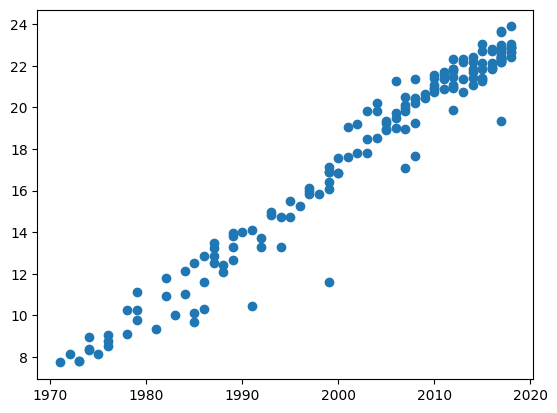

In [6]:
# Change exponential model to be linear model
Y = np.log(Y)
plt.scatter(X, Y)

In [7]:
# Scale and center both the x and y axes
mean_x = X.mean()
std_x = X.std()
mean_y = Y.mean()
std_y = Y.std()
X = (X - mean_x) / std_x
Y = (Y - mean_y) / std_y

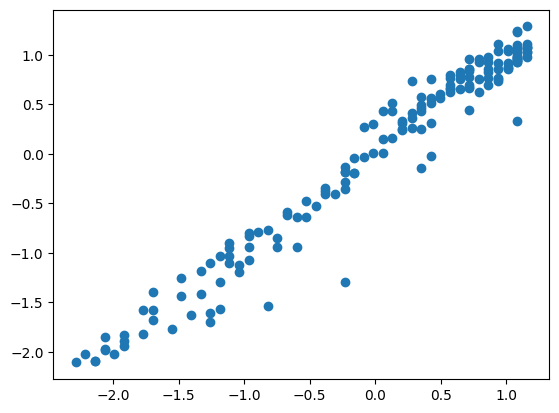

In [8]:
# Everythin is centered and in a small range
plt.scatter(X, Y)

In [9]:
def convert_numpy_to_tensor(data:np.ndarray, number_samples:int, number_features:int):
    return torch.tensor(data.reshape(number_samples, number_features).astype(np.float32))

In [11]:
inputs = convert_numpy_to_tensor(X, X.shape[0], 1)
targets = convert_numpy_to_tensor(Y, Y.shape[0], 1)

In [12]:
# Create model
model = nn.Linear(1, 1)

In [13]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [14]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [15]:
# Training

n_epochs = 1000
losses = []

for epoch in range(n_epochs):

  # Zero the accumulate gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Record of the loss
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Logging message
  print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/1000, Loss: 0.9521
Epoch 2/1000, Loss: 0.9159
Epoch 3/1000, Loss: 0.8568
Epoch 4/1000, Loss: 0.7850
Epoch 5/1000, Loss: 0.7082
Epoch 6/1000, Loss: 0.6314
Epoch 7/1000, Loss: 0.5580
Epoch 8/1000, Loss: 0.4899
Epoch 9/1000, Loss: 0.4281
Epoch 10/1000, Loss: 0.3730
Epoch 11/1000, Loss: 0.3244
Epoch 12/1000, Loss: 0.2820
Epoch 13/1000, Loss: 0.2453
Epoch 14/1000, Loss: 0.2136
Epoch 15/1000, Loss: 0.1865
Epoch 16/1000, Loss: 0.1634
Epoch 17/1000, Loss: 0.1438
Epoch 18/1000, Loss: 0.1271
Epoch 19/1000, Loss: 0.1130
Epoch 20/1000, Loss: 0.1011
Epoch 21/1000, Loss: 0.0911
Epoch 22/1000, Loss: 0.0826
Epoch 23/1000, Loss: 0.0755
Epoch 24/1000, Loss: 0.0695
Epoch 25/1000, Loss: 0.0645
Epoch 26/1000, Loss: 0.0603
Epoch 27/1000, Loss: 0.0568
Epoch 28/1000, Loss: 0.0538
Epoch 29/1000, Loss: 0.0513
Epoch 30/1000, Loss: 0.0492
Epoch 31/1000, Loss: 0.0475
Epoch 32/1000, Loss: 0.0460
Epoch 33/1000, Loss: 0.0448
Epoch 34/1000, Loss: 0.0438
Epoch 35/1000, Loss: 0.0429
Epoch 36/1000, Loss: 0.0422
E

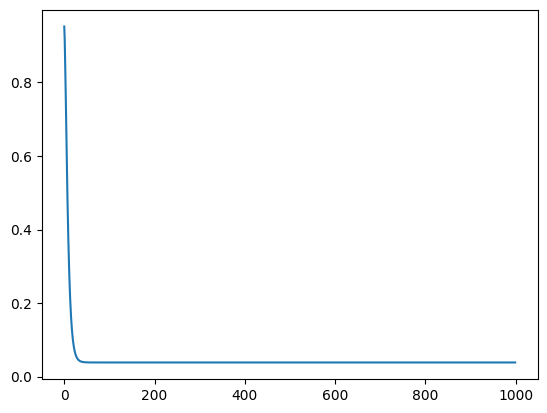

In [16]:
plt.plot(losses)

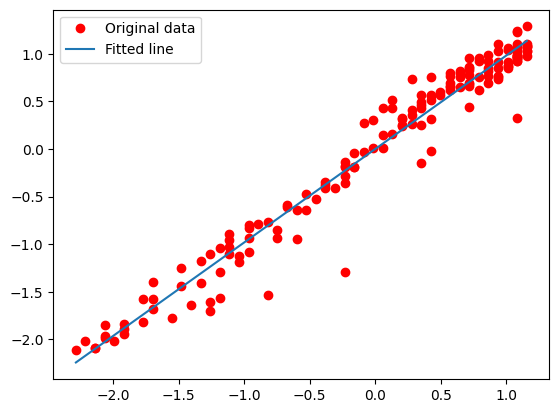

In [20]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [21]:
# Get weight
w = model.weight.data.item()
w

0.9805708527565002

In [23]:
a = w * std_y / std_x
a

0.34168239319188426

In [24]:
print(f'Time to double:{np.log(2)/a}')

Time to double:2.0286300797790395
